<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#아래의-데이터를--8:2로-나누세요" data-toc-modified-id="아래의-데이터를--8:2로-나누세요-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>아래의 데이터를  8:2로 나누세요</a></span></li><li><span><a href="#Training-data-set을-가지고-SARIMA-모델의-최적의-매개변수를-구하고-test-set을-예측해보세요" data-toc-modified-id="Training-data-set을-가지고-SARIMA-모델의-최적의-매개변수를-구하고-test-set을-예측해보세요-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Training data set을 가지고 SARIMA 모델의 최적의 매개변수를 구하고 test set을 예측해보세요</a></span></li><li><span><a href="#모델을-가지고-정확도와-데이터의-특징을-해석해보세요." data-toc-modified-id="모델을-가지고-정확도와-데이터의-특징을-해석해보세요.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>모델을 가지고 정확도와 데이터의 특징을 해석해보세요.</a></span></li></ul></div>

# 아래의 데이터를  8:2로 나누세요 
# Training data set을 가지고 SARIMA 모델의 최적의 매개변수를 구하고 test set을 예측해보세요 
# 모델을 가지고 정확도와 데이터의 특징을 해석해보세요. 

In [7]:
import pandas as pd 
df = pd.read_csv('data/sarima_data.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    105 non-null    object
 1   sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [9]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.set_index('date', inplace = True)
s_data = df
s_data

,sales
date,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


In [11]:
train_len = int(len(s_data)*0.8)
training = s_data[:train_len]
test = s_data.drop(training.index)

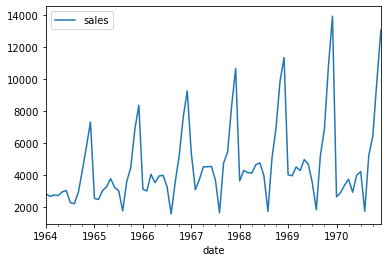

In [12]:
import matplotlib.pyplot as plt
training.plot()
plt.show()

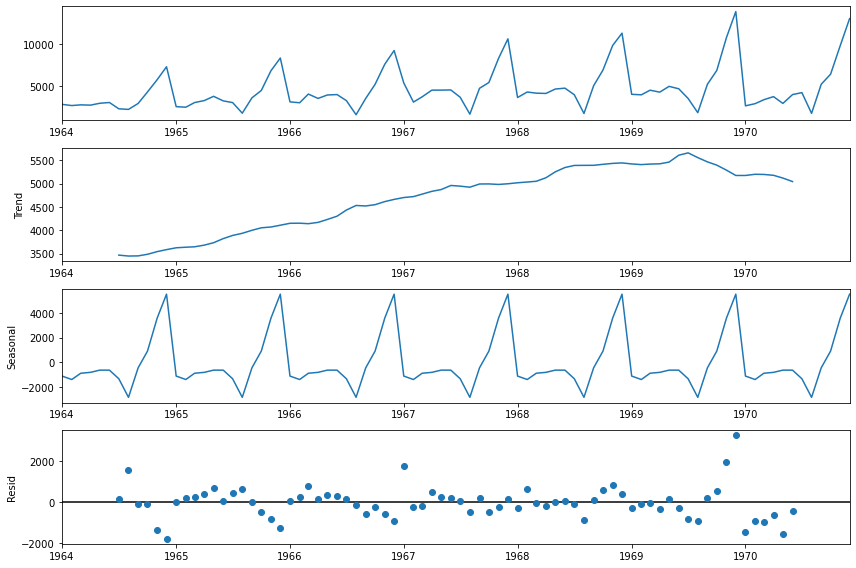

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
result = seasonal_decompose(training, model = 'additive')
plt.rcParams['figure.figsize'] = [12,8]
result.plot()
plt.show()

In [16]:
# 추세 완만한 상승, 가법모형
# 계절성 보임
# 잔차 : -2000~2000 작은 부분에 해당
# 트렌드와, 계절성에 잘 적합한 그래프이며, 이는 시계열 분석에 적합한 데이터이다.

In [17]:
# 정상성 검정
from statsmodels.tsa.stattools import adfuller
adf = adfuller(training, regression = 'ct')
adf

(2.431134386322642,
 1.0,
 11,
 72,
 {'1%': -4.090350722200789,
  '5%': -3.4733323986196845,
  '10%': -3.1637782085905353},
 1151.3937150442919)

In [18]:
# 귀무가설 : 데이터가 정상성을 갖지 않는다(변동이 있다.)
# 대립가설 : 데이터가 정상성을 갖는다

# p_value가 1.0 이므로 정상성을 갖지 않는다. > 차분 필요

<AxesSubplot:xlabel='date'>

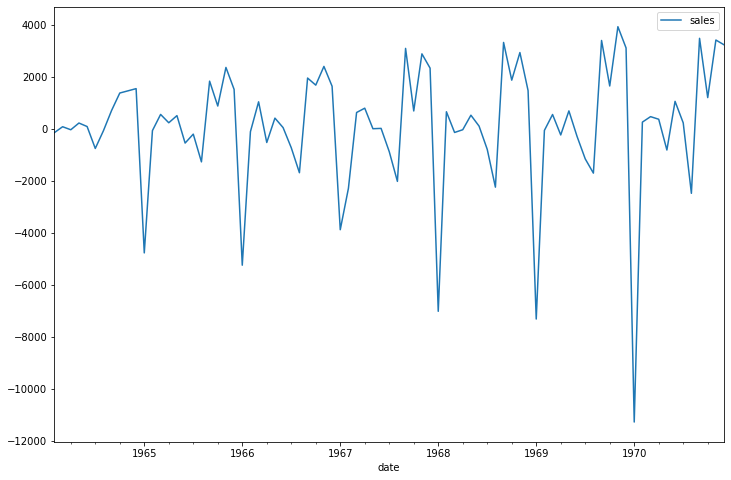

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data = training.diff(1)
diff_data = diff_data.dropna()
diff_data.plot()

In [20]:
# 정상성 재검증
adf = adfuller(diff_data)
adf 

(-21.725876749107652,
 0.0,
 10,
 72,
 {'1%': -3.524624466842421,
  '5%': -2.9026070739026064,
  '10%': -2.5886785262345677},
 1151.7755036554195)

In [21]:
# 0.0 이므로 정상성을 만족한다. > 차분 1회 실시

C:\Users\KDB\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


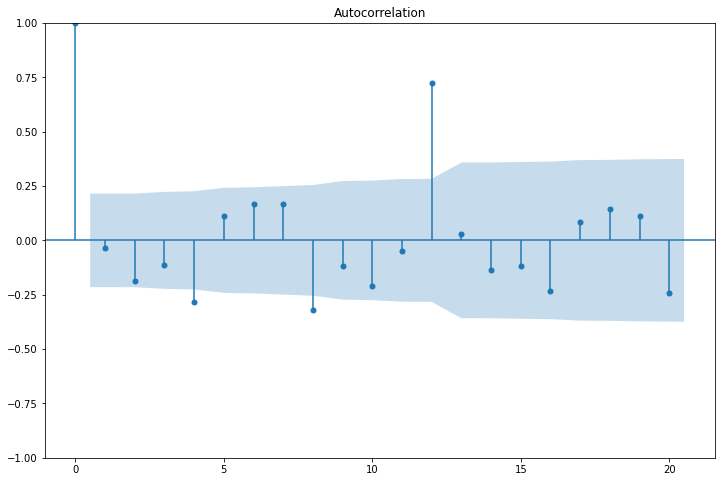

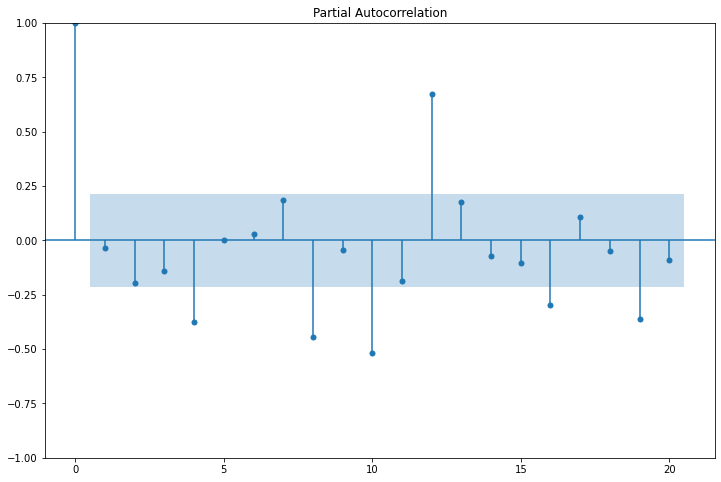

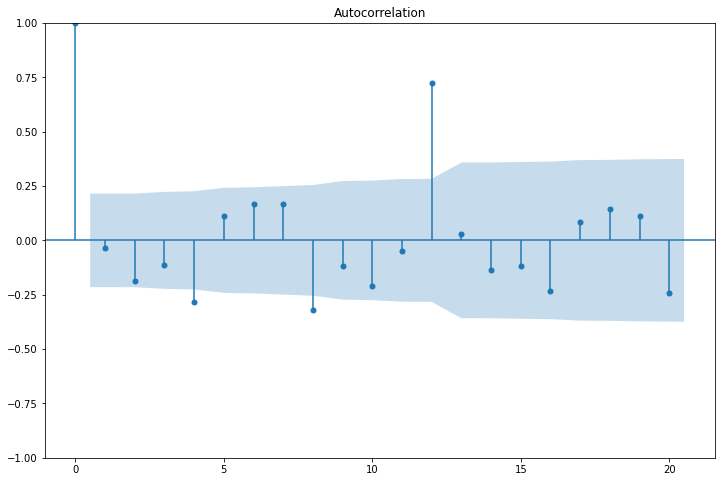

In [23]:
# AR(p), MA(q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt

plot_pacf(diff_data) # AR(p) == 0
plot_acf(diff_data) # MA(q) == 0

In [24]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

model = ARIMA(training.sales.values, order = (0,1,0))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -765.051
Date:                Thu, 29 Sep 2022   AIC                           1532.102
Time:                        17:27:46   BIC                           1534.521
Sample:                             0   HQIC                          1533.074
                                 - 84                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.868e+06   4.69e+05     12.514      0.000    4.95e+06    6.79e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               165.27
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               3.98   Skew:                            -1.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

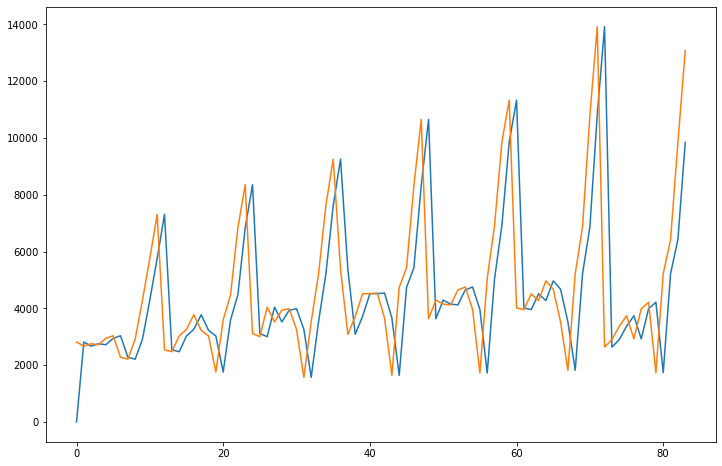

In [25]:
plt.plot(res.predict()) # 예측
plt.plot(training.sales.values) # 원본

In [27]:
# test 데이터 길이만큼 예측
forecast_data = res.forecast(steps=len(test), aplpha = 0.1)
pred_y = forecast_data.tolist()
pred_y

[13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0,
 13076.0]

In [28]:
test_y = test.values
test_y

array([[ 3934],
       [ 3162],
       [ 4286],
       [ 4676],
       [ 5010],
       [ 4874],
       [ 4633],
       [ 1659],
       [ 5951],
       [ 6981],
       [ 9851],
       [12670],
       [ 4348],
       [ 3564],
       [ 4577],
       [ 4788],
       [ 4618],
       [ 5312],
       [ 4298],
       [ 1413],
       [ 5877]], dtype=int64)

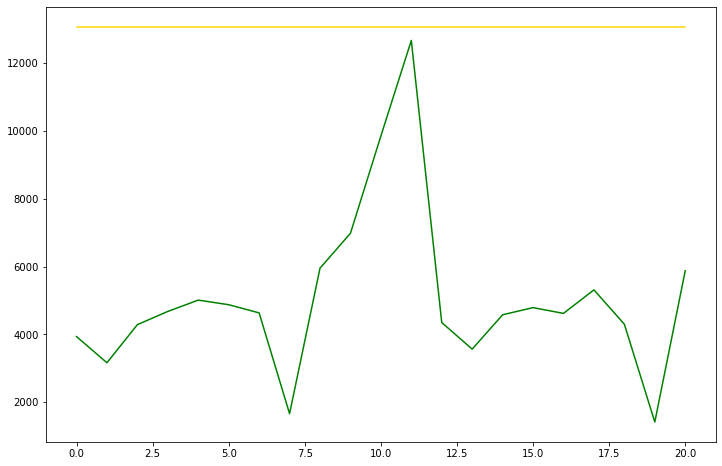

In [29]:
plt.plot(pred_y, color = 'gold') # 예측
plt.plot(test_y, color = 'green') # 원본

# 계절성 반영 X

In [15]:
# 2. Training data set을 가지고 SARIMA 모델의 최적의 매개변수를 구하고 
# test set을 예측해보세요 


In [30]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [32]:
model = SARIMAX(training.sales.values,
                order = (0,1,0),
                seasonal_order = (1,1,1,12),
                trend = 'ct',
                enforce_stationarity = True,
                enforce_invertibility = True)

results= model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   84
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -588.086
Date:                              Thu, 29 Sep 2022   AIC                           1186.171
Time:                                      17:34:01   BIC                           1197.485
Sample:                                           0   HQIC                          1190.670
                                               - 84                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     62.8062    470.894      0.133      0.894    -860.128     985.741
drift         -1.3384      8.282     -0.162      0.872     -17.570      14.894
ar.S.L12      -0.4884      0.309     -1.582      0.114      -1.094       0.117
ma.S.L12       0.2460      0.290      0.849      0.396      -0.322       0.814
sigma2      8.827e+05   1.35e+05      6.518      0.000    6.17e+05    1.15e+06
===================================================================================
Ljung-Box (L1) (Q):                  10.07   Jarque-Bera (JB):                46.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.35   Skew:                            -1.09
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

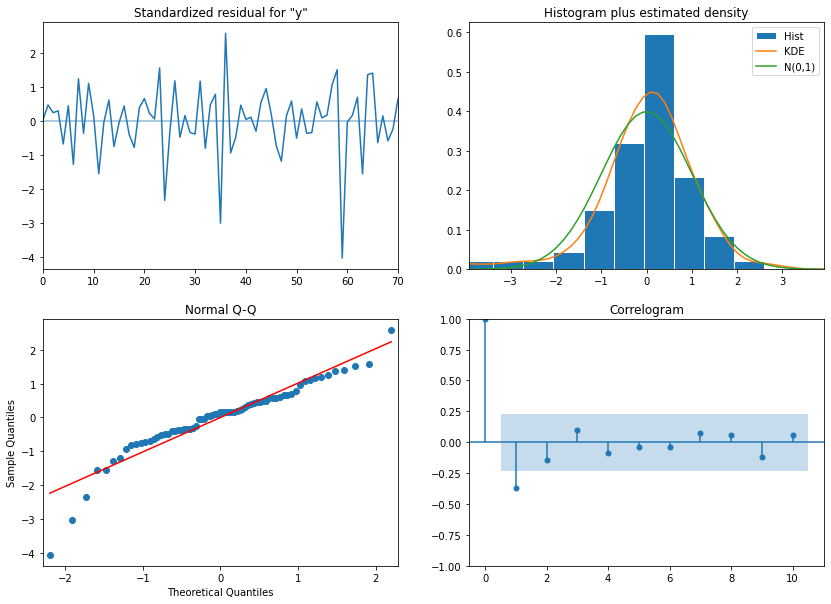

In [34]:
# 데이터 확인(위의 표는 별로 해석할 것이 없다.)
results.plot_diagnostics(figsize=(14, 10)) # plot_diagnostics 잔차의 특정 패턴을 가지고 있는지?
plt.show()

In [35]:
forecast_values = results.get_forecast(steps = len(test))
forecast_values.summary_frame()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2749.845025,939.497755,908.463260,4591.226789
1,2795.228073,1328.650458,191.121028,5399.335118
2,3292.254638,1627.257830,102.887899,6481.621378
3,3475.942279,1878.995490,-206.821208,7158.705766
4,2982.016344,2100.780821,-1135.438404,7099.471092
5,3640.317814,2301.290087,-870.127874,8150.763501
6,3463.750575,2485.677386,-1408.087579,8335.588729
7,1157.561926,2657.300900,-4050.652135,6365.775987
8,4575.148889,2818.493229,-948.996330,10099.294108
9,5799.264483,2970.952724,-23.695855,11622.224821


In [36]:
# 예측값을 그리는 함수
forecast_values.conf_int()

array([[   908.46326036,   4591.22678872],
       [   191.12102827,   5399.33511814],
       [   102.88789856,   6481.62137834],
       [  -206.82120765,   7158.70576644],
       [ -1135.43840421,   7099.47109172],
       [  -870.12787396,   8150.76350141],
       [ -1408.08757948,   8335.5887291 ],
       [ -4050.65213464,   6365.77598667],
       [  -948.99633031,  10099.29410788],
       [   -23.69585547,  11622.22482117],
       [  3241.80776871,  15456.1524178 ],
       [  6233.57450719,  18991.04141904],
       [ -5396.74840851,   8908.87767884],
       [ -6011.68392281,   9690.19217445],
       [ -6236.64809379,  10747.07612078],
       [ -6627.48899489,  11547.90270432],
       [ -7907.39022637,  11386.20556712],
       [ -7654.17722982,  12696.27273732],
       [ -8207.69680394,  13147.36791354],
       [-11153.0524284 ,  11161.44430154],
       [ -8239.82523612,  14994.51872995]])

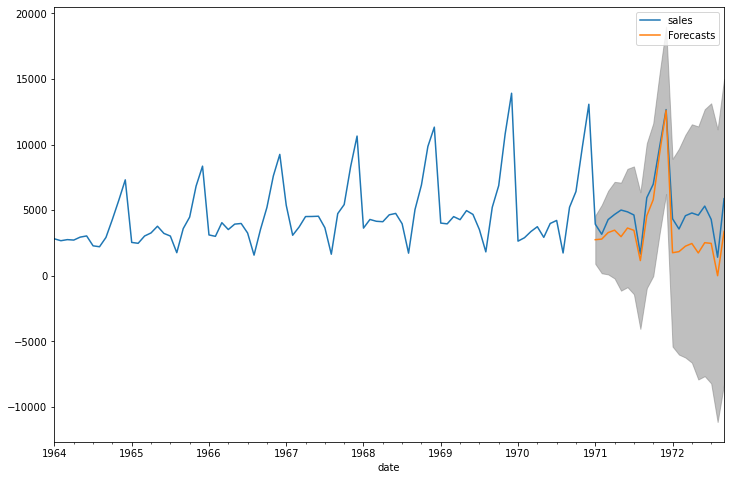

In [37]:
ax = s_data.plot()
pred_ci = pd.DataFrame(forecast_values.conf_int())
pred_ci.index = list(test.index)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color = 'gray',
                alpha = 0.5)

predicted = pd.DataFrame(forecast_values.predicted_mean)
predicted.index = list(test.index)
predicted.columns = ['Forecasts']
predicted.plot(ax=ax, label = 'Forecasts')

plt.legend()
plt.show()

In [38]:
from sklearn.metrics import r2_score
r2_score(predicted, test) # 약 59% 설명력
# 끝으로 갈 수록 멀어지기 떄문에 RMSE 값이 떨어진다.
# 대문자 P, D, Q를 자동 지정해주는 AUTO_ARMIA를 활용해보자

0.5975209816901242

In [39]:
from pmdarima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
auto_model = auto_arima(training, start_P = 1, start_D = 1, start_Q = 1,
                        max_P = 5, max_D = 5, max_Q = 5, m = 12,
                        seasonal = True, information_criterion = 'aic',
                        trace = True, stepwise = True)

In [ ]:
# 학습 데이터셋으로부터 test 데이터 길이만큼 예측
prediction = pd.DataFrame(auto_model.predict(n_periods = len(test)),
             index = test.index)
prediction

In [ ]:
prediction.columns = ['predicted_sales']
prediction

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(training, label="Train") # Train 데이터 
plt.plot(prediction, label="Prediction") # 모델이 예상한 그래프 
plt.plot(test, label="Test") # 실제 가격 그래프 

plt.legend(loc='upper left')
plt.show()

In [ ]:
import numpy as np
import math
rmse = np.sqrt(mean_squared_error(test['price'], test['predicted_sales']))
rmse 

In [ ]:
# 3. 모델을 가지고 정확도와 데이터의 특징을 해석해보세요. 